#pilot for the jupyter notebook

In [1]:
require(Hmisc) #for rcorr
require(reshape2) #for melt
require(ggplot2)
require(psych) #for descriptive stats
require(Rmisc) #for summarySE
require(car) #for scatter plot matrix
require(GPArotation) #for factor analysis
source("R_functions_forJupyter.R")
###Configuration part

statsRD<-2 ##decimal place for means, std, etc
pvalRD<-3 ###decimal place for p value

###########
data<-read.csv("ASD_heterogeneity_SEM.csv")
###########
print(summary(data))

Loading required package: Hmisc
Warning message:
“package ‘Hmisc’ was built under R version 3.3.2”Loading required package: lattice
Warning message:
“package ‘lattice’ was built under R version 3.3.2”Loading required package: survival
Warning message:
“package ‘survival’ was built under R version 3.3.2”Loading required package: Formula
Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”
Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: reshape2
Loading required package: psych
Warning message:
“package ‘psych’ was built under R version 3.3.2”
Attaching package: ‘psych’

The following object is masked from ‘package:Hmisc’:

    describe

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

Loading required package: Rmisc
Loading required package: plyr

Attaching package: ‘plyr’

The following objects are mas

     ScanID      Group      Dthreshold      NoDecTime       DriftRate     
 Min.   : 1.00   ASD:16   Min.   :2.270   Min.   :0.000   Min.   :0.2600  
 1st Qu.: 8.75   TD :16   1st Qu.:2.825   1st Qu.:0.750   1st Qu.:0.6475  
 Median :16.50            Median :3.035   Median :0.965   Median :0.9200  
 Mean   :16.50            Mean   :3.275   Mean   :1.021   Mean   :0.9006  
 3rd Qu.:24.25            3rd Qu.:3.812   3rd Qu.:1.460   3rd Qu.:1.1000  
 Max.   :32.00            Max.   :4.650   Max.   :2.630   Max.   :1.8800  
    Num_Ops          L_FG_Act       
 Min.   : 82.00   Min.   :-2.18660  
 1st Qu.: 93.75   1st Qu.:-0.60318  
 Median :113.50   Median :-0.09550  
 Mean   :111.62   Mean   :-0.05314  
 3rd Qu.:120.00   3rd Qu.: 0.43700  
 Max.   :158.00   Max.   : 2.06680  


#create histograms to visualize the distribution of the data

pdf 
  2

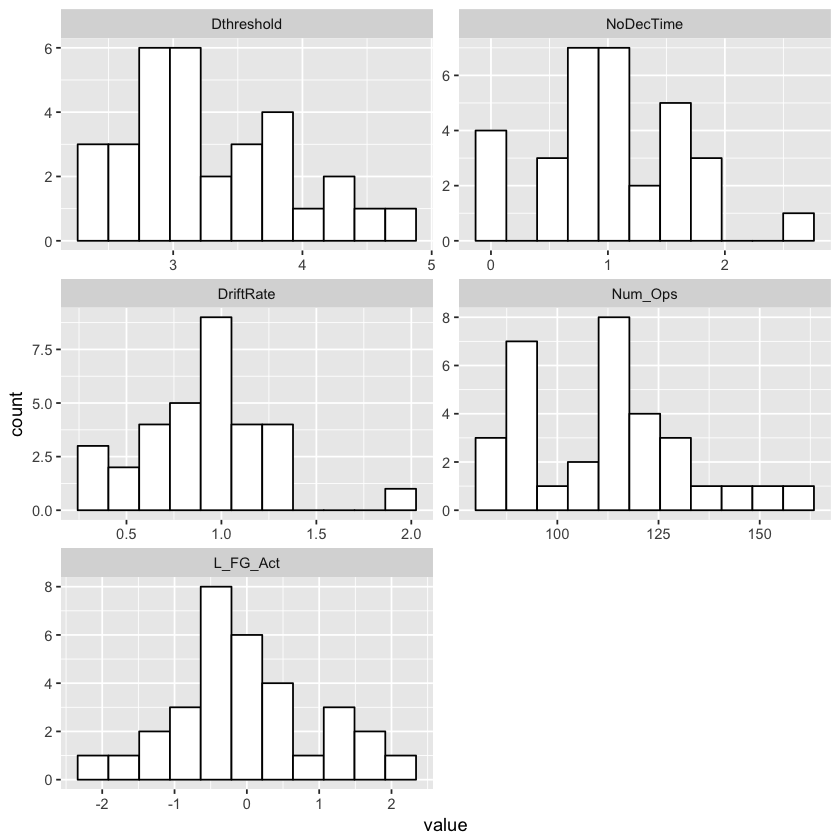

In [2]:
hist_mat(data,3,"ASD_Hetero_FG") ##starting point of variables to be plotted is 3, and the file name is "" to save the pdf file

#create table for t-test on variables between groups (ASD vs. TD)

In [3]:
mk_ttable(data,2,3,"ASD_hetero_FG",statsRD,pvalRD)

           t-value df p-value lower.ci upper.ci group1mean group2mean
Dthreshold    4.59 30   0.000     0.45     1.17       3.68       2.87
NoDecTime    -1.96 30   0.059    -0.83     0.02       0.82       1.22
DriftRate     1.33 30   0.194    -0.08     0.39       0.98       0.82
Num_Ops       1.51 30   0.141    -3.67    24.67     116.88     106.38
L_FG_Act     -0.94 30   0.353    -1.05     0.39      -0.22       0.11


 #create bar graphs to visualize the differences (Num_Ops) is excluded because of the scale is different

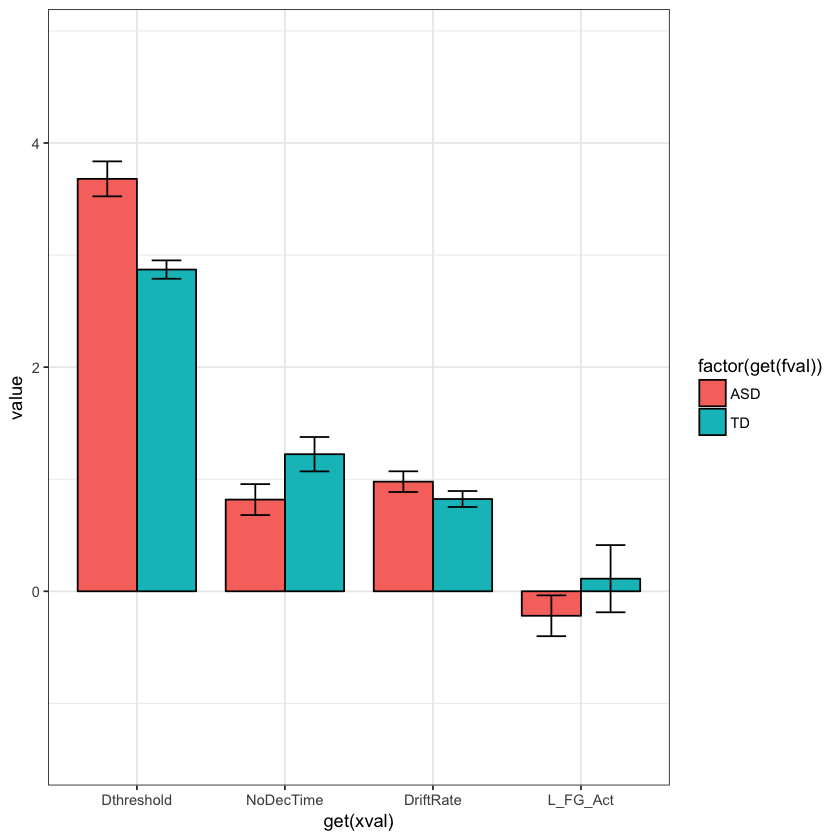

In [4]:
mk_grpbargraph(data,2,c(3:5,7),"ASD_hetero_FG",0,6,15)

###moderator models

In [5]:
mod.mod1<-lm(Num_Ops ~ L_FG_Act*Dthreshold,data=data)
summary(mod.mod1)

mod.mod2<-lm(L_FG_Act ~ Num_Ops*Dthreshold,data=data)
summary(mod.mod2)

mod.asd<-lm(L_FG_Act ~ Num_Ops*Dthreshold,data=data[data$Group=="ASD",])
summary(mod.asd)
mod.td<-lm(L_FG_Act ~ Num_Ops*Dthreshold,data=data[data$Group=="TD",])
summary(mod.td)


Call:
lm(formula = Num_Ops ~ L_FG_Act * Dthreshold, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.775 -14.554   0.842  12.708  38.901 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           82.727     19.089   4.334 0.000171 ***
L_FG_Act             -29.368     20.851  -1.408 0.170002    
Dthreshold             9.141      5.670   1.612 0.118178    
L_FG_Act:Dthreshold    9.244      6.561   1.409 0.169814    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.87 on 28 degrees of freedom
Multiple R-squared:  0.1986,	Adjusted R-squared:  0.1127 
F-statistic: 2.313 on 3 and 28 DF,  p-value: 0.09762



Call:
lm(formula = L_FG_Act ~ Num_Ops * Dthreshold, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01763 -0.47966  0.02666  0.63355  1.76014 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)        14.66678    5.58425   2.626   0.0138 *
Num_Ops            -0.12196    0.04897  -2.491   0.0189 *
Dthreshold         -4.27406    1.62399  -2.632   0.0137 *
Num_Ops:Dthreshold  0.03482    0.01387   2.511   0.0181 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.927 on 28 degrees of freedom
Multiple R-squared:  0.2091,	Adjusted R-squared:  0.1243 
F-statistic: 2.467 on 3 and 28 DF,  p-value: 0.08279



Call:
lm(formula = L_FG_Act ~ Num_Ops * Dthreshold, data = data[data$Group == 
    "ASD", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97967 -0.37939 -0.02525  0.35771  1.41472 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)        -0.5487268  6.3336650  -0.087    0.932
Num_Ops             0.0006489  0.0544152   0.012    0.991
Dthreshold         -0.4917065  1.6733444  -0.294    0.774
Num_Ops:Dthreshold  0.0047543  0.0141295   0.336    0.742

Residual standard error: 0.6611 on 12 degrees of freedom
Multiple R-squared:  0.3416,	Adjusted R-squared:  0.1771 
F-statistic: 2.076 on 3 and 12 DF,  p-value: 0.157



Call:
lm(formula = L_FG_Act ~ Num_Ops * Dthreshold, data = data[data$Group == 
    "TD", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7948 -0.5008  0.1557  0.5787  1.2662 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)         7.125646  25.403254   0.281    0.784
Num_Ops            -0.027275   0.228232  -0.120    0.907
Dthreshold         -1.312372   8.582407  -0.153    0.881
Num_Ops:Dthreshold -0.001125   0.076598  -0.015    0.989

Residual standard error: 1.022 on 12 degrees of freedom
Multiple R-squared:  0.4196,	Adjusted R-squared:  0.2745 
F-statistic: 2.892 on 3 and 12 DF,  p-value: 0.07928
